<a href="https://colab.research.google.com/github/MhdRaihanB/ML_Tasks_MhdRaihanB/blob/main/11thWeekTasks/LeNet_MNIST_Muhammad%20Raihan%20B_1103213077.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Muhammad Raihan Butar-Butar

NIM : 1103213077

Tugas Lecture 11 LeNet

Dataset : MNIST

Dokumentasi ChatGPT : https://chatgpt.com/share/5fa3940b-9612-469e-9435-c917c3d5bd9a

# IMPORT LIBRARY

In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# LOAD DATASET

In [3]:
# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


# PREPROCESSING

In [4]:
# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

# MODELING

In [5]:
# Define the LeNet model
model = models.Sequential()
model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Show model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

In [6]:
# Train the model
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/5
938/938 [==============================] - 28s 28ms/step - loss: 0.2416 - accuracy: 0.9282 - val_loss: 0.0886 - val_accuracy: 0.9736
Epoch 2/5
938/938 [==============================] - 27s 29ms/step - loss: 0.0736 - accuracy: 0.9768 - val_loss: 0.0467 - val_accuracy: 0.9849
Epoch 3/5
938/938 [==============================] - 27s 29ms/step - loss: 0.0541 - accuracy: 0.9827 - val_loss: 0.0391 - val_accuracy: 0.9883
Epoch 4/5
938/938 [==============================] - 27s 29ms/step - loss: 0.0419 - accuracy: 0.9873 - val_loss: 0.0360 - val_accuracy: 0.9873
Epoch 5/5
938/938 [==============================] - 28s 30ms/step - loss: 0.0337 - accuracy: 0.9892 - val_loss: 0.0324 - val_accuracy: 0.9889


In [7]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0324 - accuracy: 0.9889
Test accuracy: 0.9889000058174133


# VISUALISASI MODEL

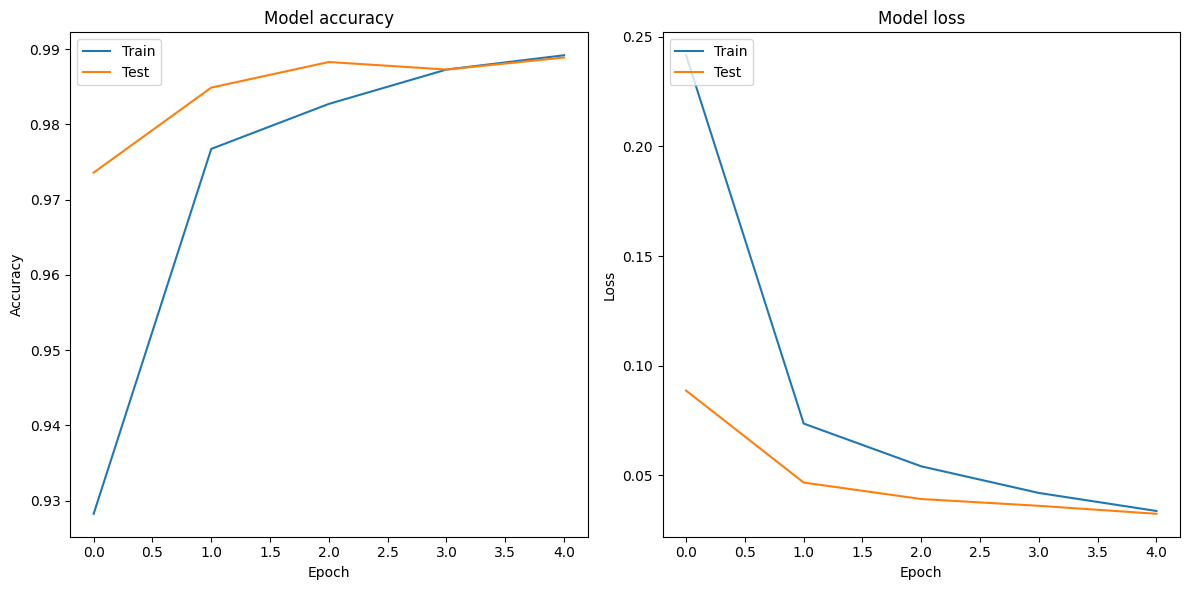

In [16]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot training & validation accuracy values
axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_title('Model accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('Model loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train', 'Test'], loc='upper left')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()